In [10]:
import os

# 2x 2 chips (4 cores) per process:
os.environ["TPU_CHIPS_PER_HOST_BOUNDS"] = "1,2,1"
os.environ["TPU_HOST_BOUNDS"] = "1,1,1"
# Different per process:
os.environ["TPU_VISIBLE_DEVICES"] = "0,1"  # Change to "2,3" for the second machine
# Pick a unique port per process
os.environ["TPU_MESH_CONTROLLER_ADDRESS"] = "localhost:8476"
os.environ["TPU_MESH_CONTROLLER_PORT"] = "8476"

print("done")

done


In [3]:
print(1050 / 700.0)
print(1350 / 900)

1.5
1.5


In [1]:
import jax

print(jax.devices())  #

[CpuDevice(id=0)]


In [2]:
# Silence WARNING:root:The use of `check_types` is deprecated and does not have any effect.
# https://github.com/tensorflow/probability/issues/1523
import logging

logger = logging.getLogger()


class CheckTypesFilter(logging.Filter):
    def filter(self, record):
        return "check_types" not in record.getMessage()


logger.addFilter(CheckTypesFilter())

In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
import pandas as pd

df0 = pd.read_csv("/Users/kpmurphy/Misc/chocolate-nobel.csv")
print(df0.columns)
df0.head()

Index(['Unnamed: 0', 'COUNTRY', 'CHOCOLATE', 'NOBEL', 'POPULATION',
       'INTERNET'],
      dtype='object')


,Unnamed: 0,COUNTRY,CHOCOLATE,NOBEL,POPULATION,INTERNET
0,1,Australia,4.5,5.5,22,79.5
1,2,Austria,10.2,24.3,8,79.8
2,3,Belgium,4.4,8.6,11,78.0
3,4,Brazil,2.9,0.1,197,45.0
4,5,Canada,3.9,6.1,34,83.0


In [35]:
def cleanup_columns(df):
    df = df.drop(columns=["Unnamed: 0", "POPULATION", "INTERNET"])
    df.columns = map(str.lower, df.columns)
    df = df.rename(columns={"chocolate": "x", "nobel": "y"})
    return df


def drop_sweden(df):
    return df[df.country != "Sweden"]


df = drop_sweden(cleanup_columns(df0))
print(df)

        country     x     y
0     Australia   4.5   5.5
1       Austria  10.2  24.3
2       Belgium   4.4   8.6
3        Brazil   2.9   0.1
4        Canada   3.9   6.1
5         China   0.7   0.1
6       Denmark   8.5  25.3
7       Finland   7.3   7.6
8        France   6.3   9.0
9       Germany  11.6  12.7
10       Greece   2.5   1.9
11      Ireland   8.8  12.7
12        Italy   3.7   3.3
13        Japan   1.8   1.5
14  Netherlands   4.5  11.4
15       Norway   9.4  25.5
16       Poland   3.6   3.1
17     Portugal   2.0   1.9
18        Spain   3.6   1.7
20  Switzerland  11.9  31.5
21           UK   9.7  18.9
22          USA   5.3  10.8


In [28]:
import numpy as np


def add_noise(df):
    N = len(df)
    np.random.seed(0)
    noise_x = np.random.normal(0, 1, size=N)
    noise_y = np.random.normal(0, 1, size=N)
    df["x"] = df["x"] + noise_x
    df["y"] = (df["y"] * 100) + noise_y
    return df

In [36]:
df = pd.read_csv("/Users/kpmurphy/Misc/chocolate-nobel.csv").pipe(cleanup_columns).pipe(drop_sweden).pipe(add_noise)

print(df)

        country          x            y
0     Australia   6.264052   550.864436
1       Austria  10.600157  2429.257835
2       Belgium   5.378738   862.269755
3        Brazil   5.140893     8.545634
4        Canada   5.767558   610.045759
5         China  -0.277278     9.812816
6       Denmark   9.450088  2531.532779
7       Finland   7.148643   761.469359
8        France   6.196781   900.154947
9       Germany  12.010599  1270.378163
10       Greece   2.644044   189.112214
11      Ireland  10.254274  1268.019204
12        Italy   4.461038   329.652088
13        Japan   1.921675   150.156349
14  Netherlands   4.943863  1141.230291
15       Norway   9.733674  2551.202380
16       Poland   5.094079   309.612673
17     Portugal   1.794842   189.697697
18        Spain   3.913068   168.951447
20  Switzerland  11.045904  3148.579982
21           UK   7.147010  1888.293730
22          USA   5.953619  1081.950775


<AxesSubplot: xlabel='x', ylabel='y'>

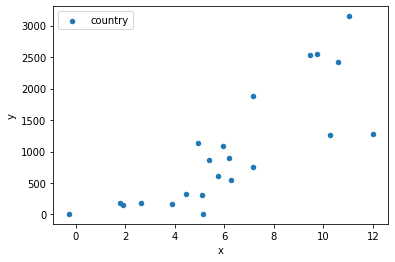

In [37]:
df.plot.scatter(x="x", y="y", label="country")

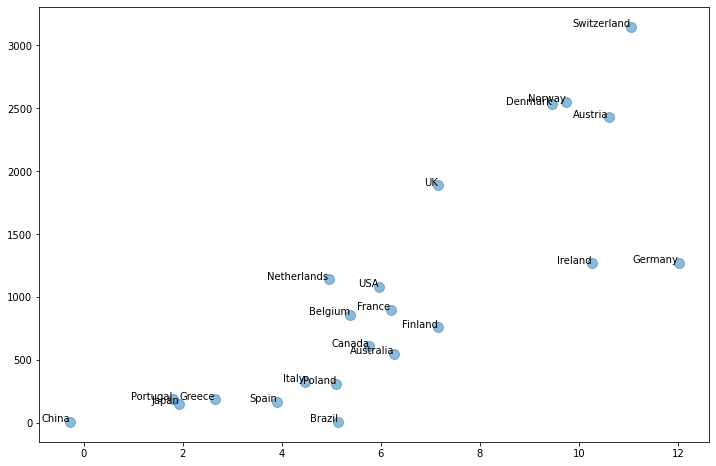

In [39]:
# Label points with country names
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.scatter(df["x"], df["y"], s=100, alpha=0.5)
for i, txt in enumerate(df["country"]):
    plt.annotate(txt, (df["x"].iat[i], df["y"].iat[i]), fontsize=10, ha="right")

In [41]:
df.to_csv("/Users/kpmurphy/Misc/noisy-choc.csv")